# OS Assignment
# 20bce195 , PARTH PATEL
<br>

## Write a program to implement the following scheduling algorithm in a single program through switch case with following as a             
MENU:<br>
              1. FCFS<br>
              2. SJF<br>
              3. SRTF<br>
              4. RR(time quanta from the user at run time)<br>
              5. Exit<br>

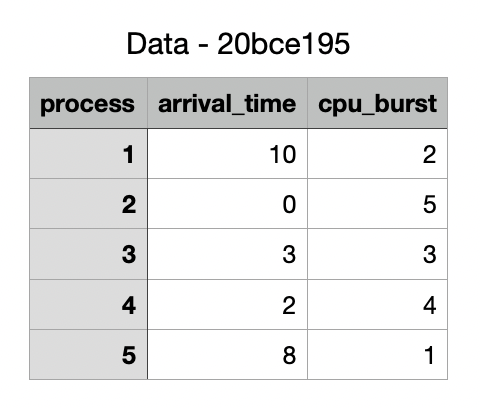

In [1]:
import pandas as pd

data = pd.read_csv("Data.csv").to_dict() # data is read from a csv file.
Table = pd.DataFrame(data)
Table.index+=1
print(Table.to_string(index=False))

process = list(data['process'].values())
arrival = list(data['arrival_time'].values())
burst = list(data['cpu_burst'].values())
num = len(data['process'].keys())


 process  arrival_time  cpu_burst
       1            10          2
       2             0          5
       3             3          3
       4             2          4
       5             8          1


## MENU FUNCTION

In [2]:
def menu(): # just printing menu function
    print("\n\n-----------------------------------------------------------------------")
    print("MENU:\n")
    print("\t1. FCFS\n")
    print("\t2. SJF\n")
    print("\t3. SRTF\n")
    print("\t4. RR(time quanta from the user at run time)\n")
    print("\t5. Exit\n")

    choice=int(input("Enter Choice: "))
    return choice

# FIRST COME FIRST SERVE SCHEDULLING

In [3]:
def FCFS():
    print("\n------FIRST COME FIRST SERVE SCHEDULLING------\n")
    n = num
    process_queue = []
    w_time = 0                                                 #total wait time
    tar_time = 0                                               #total TAR
    r_time=0                                                   #total response time
    
    for i in range(n):                                         #loop to copy data in process queue
        process_queue.append([])
        process_queue[i].append(process[i])
        process_queue[i].append(arrival[i])
        process_queue[i].append(burst[i])
    process_queue.sort(key = lambda process_queue:process_queue[1])    #sorting for fcfs

    j=0                                                        #completion time variable
    i=0
    print("GHANTT CHART")
    while (i<n):
        k=process_queue[i][2]                                  #burst time
        if (j >= process_queue[i][1]):
            print (str(process_queue[i][0])*k,end="")
            r_time+= j-process_queue[i][1]
            j+=k
            tar_time+= (j-process_queue[i][1])                #total tar = tar + (comp_time - arrival time)
            w_time+= ((j-process_queue[i][1]) - k)            # total wt = wt + (tar-bt)
            
            i+=1
            
        else:
            print("-",end="")                                 # if no process running
            j+=1

    print("\n")
    print ("Average Turn Arround time:",(tar_time/n))
    print ("Average Waiting time:",(w_time/n))
    print ("Average Response time:",(r_time/n))
    print ("overall throughput:",(j/n))
    print("-----------------------------------------------------------------------\n\n")

# SHORTEST JOB FIRST SCHEDULLING

In [4]:
def SJF():
    print("\n------SHORTEST JOB FIRST SCHEDULLING------\n")
    n = num
    process_array= [process, arrival,burst, [0]*n, [0]*n, [0]*n]
    sort_sjf(n, process_array)
    ct(n, process_array)
    print("GHANTT CHART")
    for i in range(n):
        print(str(process_array[0][i])*process_array[2][i],end="")
        
    print("\n\n")
    
    w_time = 0
    tar_time = 0
    r_time = 0
    
    for i in range(0, n):
        w_time += process_array[4][i]
        tar_time += process_array[5][i]
        r_time += process_array[4][i]
        
    print ("Average Turn Arround time:",(tar_time/n))
    print ("Average Waiting time:",(w_time/n))
    print ("Average Response time:",(r_time/n))
    print ("overall throughput:",(process_array[3][n-1]/n))
    print("-----------------------------------------------------------------------\n\n")
    
def sort_sjf(n, process):
    for i in range(0, n):
        for j in range(i, n-i-1):
            if process[1][j] > process[1][j+1]:
                for k in range(0, n):
                    process[k][j], process[k][j+1] = process[k][j+1], process[k][j]
  
  
def ct(n, process):
    value = 0
    process[3][0] = process[1][0] + process[2][0]
    process[5][0] = process[3][0] - process[1][0]
    process[4][0] = process[5][0] - process[2][0]
    for i in range(1, n):
        temp = process[3][i-1]
        mini = process[2][i]
        for j in range(i, n):
            if temp >= process[1][j] and mini >= process[2][j]:
                mini = process[2][j]
                value = j
        process[3][value] = temp + process[2][value]
        process[5][value] = process[3][value] - process[1][value]
        process[4][value] = process[5][value] - process[2][value]
        for k in range(0, 6):
            process[k][value], process[k][i] = process[k][i], process[k][value]

# Shortest Remaining Time First

In [5]:
def SRTF():
        print("\n------Shortest Remaining Time First------\n")
        print("GHANTT CHART")
        process_q=[]
        for i in range(5):                                         
            process_q.append([])
            process_q[i].append(process[i])
            process_q[i].append(arrival[i])
            process_q[i].append(burst[i])
        avgTime(process_q)
        print("-----------------------------------------------------------------------\n\n")
        
def waitingTime(process, wt):
        n=len(process)
        rt=[0]*n

        for i in range(n):
                rt[i]=process[i][2]

        complete=0
        short=0
        current_t=0
        min_t=9999999
        flag=False
        res=0
        list=[]
        while(complete!=n):
                for i in range(n):
                        if process[i][1]<=current_t and rt[i]<min_t and rt[i]>0:
                                min_t=rt[i]
                                short=i
                                flag=True

                if flag==False:
                        current_t+=1
                        print("-")
                        continue

                rt[short]-=1
                print(str(process[short][0]),end="")
                if process[short][0] not in list:
                    list.append(process[short][0])
                    res+= current_t                                 
                    res-= process[short][1]
                min_t=rt[short]

                if(min_t==0):
                        min_t=9999999

                if rt[short]==0:
                        complete+=1
                        flag=False
                        final_t=current_t+1
                        wt[short]=final_t-process[short][1]-process[short][2]

                        if wt[short]<0:
                                wt[short]=0
                current_t+=1
        print ("\n\nOverall throughput:",(current_t/n))
        print ("Average Response time:",(res/n))
        
def turnAroundtime(process, wt, tat):
        for i in range(len(process)):
                tat[i]=process[i][2]+wt[i]

def avgTime(process):
        n=len(process)
        wt=[0]*n
        tat=[0]*n
        total_wt=0
        total_tat=0

        waitingTime(process, wt)
        turnAroundtime(process, wt, tat)

        for i in range(n):
                total_wt=total_wt+wt[i]

        for i in range(n):
                total_tat=total_tat+tat[i]

        avg_wt=total_wt/n
        avg_tat=total_tat/n

        display(process, wt, tat, avg_wt, avg_tat)

def display(process, wt, tat, avg_wt, avg_tat):
    print('\nAverage Waiting Time: ', avg_wt)
    print('Average Turn Around: ', avg_tat)


# Round Robin scheduling

In [6]:
def RR():
        print("\n------Round Robin scheduling------\n")
        print("GHANTT CHART")
        process_queue=[]
        n = num
        for i in range(n):                                        
            process_queue.append([])
            process_queue[i].append(process[i])
            process_queue[i].append(arrival[i])
            process_queue[i].append(burst[i])
        process_queue.sort(key = lambda process_queue:process_queue[1])
        proc=[]
        burst_time=[]
        arrival_time=[]
        for i in range(n):
            proc.append(process_queue[i][0])
            arrival_time.append(process_queue[i][2])
            burst_time.append(process_queue[i][2])
        quantum = int(input("ENTER QUANTUM VALUE: "));
        AVG(proc, n, burst_time, quantum,arrival_time)
        print("-----------------------------------------------------------------------\n\n")

def FWT(processes, n, bt,wt, quantum,arrival_time):
        time=0
        res=0
        list=[]
        rem_bt = [0] * n
        for i in range(n):
                rem_bt[i] = bt[i]
        t = 0 
        while(1):
                done = True
                for i in range(n):
                        if (rem_bt[i] > 0) :
                                time+=1
                                if processes[i] not in list:
                                    list.append(processes[i])
                                    res+= time 
                                    res-= arrival_time[i]
                                done = False
                                if (rem_bt[i] > quantum) :
                                        t += quantum
                                        print(str(processes[i])*quantum,end="")
                                        rem_bt[i] -= quantum
                                else:
                                        print(str(processes[i])*rem_bt[i],end="")
                                        t = t + rem_bt[i]
                                        wt[i] = t - bt[i]
                                        rem_bt[i] = 0
                if (done == True):
                        print ("\n\nOverall throughput:",(time/n))
                        print ("Average Response time:",(res/n))
                        break
                        
def FTAR(processes, n, bt, wt, tat):
        for i in range(n):
                tat[i] = bt[i] + wt[i]

def AVG(processes, n, bt, quantum,arrival_time):
        wt = [0] * n
        tat = [0] * n
        FWT(processes, n, bt,wt, quantum,arrival_time)
        FTAR(processes, n, bt, wt, tat)
        total_wt = 0
        total_tat = 0
        for i in range(n):
                total_wt = total_wt + wt[i]
                total_tat = total_tat + tat[i]
        print("Average waiting time = %.5f "%(total_wt /n) )
        print("Average turn around time = %.5f "% (total_tat / n))

# TO RUN THE PROJECT

In [7]:
while 1:
    ch=menu()
    if ch == 5:
        break
    elif ch == 1:
        FCFS()
    elif ch == 2:
        SJF()
    elif ch == 3:
        SRTF()
    elif ch == 4:
        RR()
    else :
        print("!!!! INVALID INPUT, TRY AGAIN !!!!")



-----------------------------------------------------------------------
MENU:

	1. FCFS

	2. SJF

	3. SRTF

	4. RR(time quanta from the user at run time)

	5. Exit

Enter Choice: 1

------FIRST COME FIRST SERVE SCHEDULLING------

GHANTT CHART
222224444333511

Average Turn Arround time: 6.2
Average Waiting time: 3.2
Average Response time: 3.2
overall throughput: 3.0
-----------------------------------------------------------------------




-----------------------------------------------------------------------
MENU:

	1. FCFS

	2. SJF

	3. SRTF

	4. RR(time quanta from the user at run time)

	5. Exit

Enter Choice: 2

------SHORTEST JOB FIRST SCHEDULLING------

GHANTT CHART
222223335444411


Average Turn Arround time: 5.4
Average Waiting time: 2.4
Average Response time: 2.4
overall throughput: 3.0
-----------------------------------------------------------------------




-----------------------------------------------------------------------
MENU:

	1. FCFS

	2. SJF

	3. SRTF

	4. R